# HW 10 - Key

## SDS348 Spring 2021

### Enter your name and EID here

**This homework is due on May 3, 2021 at 8am. Submit a pdf file on Gradescope.**

*For all questions, include the Python commands/functions that you used to find your answer. Answers without supporting code will not receive credit. Write full sentences to describe your findings.*

In [1]:
# Import packages
import pandas as pd
import seaborn as sns

### Question 1: (14 pts)

Tips for food servers at restaurants are a major component of pay (at least in the United States) and may be influenced by many factors. At one restaurant, a food server recorded the following data `tips` on all customers they served during an interval of two and a half months in early 1990. Each record includes the total bill (in dollars), the tip (in dollars), the gender of the server, if patrons were sitting in a smoking area or not, the day and time, and the size of the party.

#### 1.1 (2 pts) The dataset `tips` is from the package `seaborn`. Run the code below to save the dataset in your environment. Take a peek at the first few rows using `.head()`. How many observations are there and how many columns? What does one row represent?

In [2]:
# Import dataset
tips = sns.load_dataset('tips')

In [3]:
# answer
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
len(tips)

244

The dataset has 244 observations, each representing a table with associated server.   

**-1pt if no code for taking a peek   
-1pt if no sentence about observation** 

#### 1.2 (3 pts) Use the function `.describe()`. Interpret at least one statistic for each variable. You can interpret the same statistics multiple times but remember to include units.

In [5]:
# answer
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Answers will vary but for example: The mean total bill was about $19.79 with a mean tip of $3.00. The size of the party varied between 1 and 6 patrons.   

**-0.5pt if code is missing    
-0.5pt per statistic described** 

#### 1.3 (3 pts) Which variables do not appear in the summary table created in 1.2? Describe the missing variables. (*Hint: what type of variables were dropped and what basic statistic do we usually use to describe such type of variables?*)

In [6]:
# answer
tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [7]:
tips['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [8]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [9]:
tips['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

Categorical variables did not appear in the summary table. Counts or proportions are used to describe categorical variables. They were mainly male servers in the dataset, mostly working in nonsmoking area, data was collected mostly on weekends and at dinner time.     

**-1pt if not identifying categorical variables were missing    
-0.5pt per code for each categorical variable  
-1pt if no sentence to describe** 

#### 1.4 (2 pts) Calculate the tip percentage (amount of tip compared to total bill) using `pandas` functions. Add this percentage as a variable in the data `tips`. Using `pandas` functions similar to `dplyr` functions in `R`, compute the mean and standard deviation and report counts of tip percentage per gender. Does the mean tip percentage seem to differ across gender? What test should we conduct to check for significance?

In [10]:
# answer
tips = tips.assign(percent_tip = tips['tip'] / tips['total_bill'])

In [11]:
(tips.groupby(['sex'])
 .agg(['mean', 'std', 'size']))

total_bill                      tip                     size            \
             mean       std size      mean       std size      mean       std   
sex                                                                             
Male    20.744076  9.246469  157  3.089618  1.489102  157  2.630573  0.955997   
Female  18.056897  8.009209   87  2.833448  1.159495   87  2.459770  0.937644   

            percent_tip                 
       size        mean       std size  
sex                                     
Male    157    0.157651  0.064778  157  
Female   87    0.166491  0.053632   87

The mean tip percentage for females is about 16.6% while it is about 15.8% for males. Does not seem that different but we should perform an independent t-test to check if the difference is significant.   

**-1pt if no code/incorrect for tip percentage  
-0.5pt if no code/incorrect for mean, sd, count  
-0.5pt if no sentence about the difference in means
-1pt if no type of test: independent t-test** 

#### 1.5 (4 pts) Conduct the appropriate test discussed in the previous question: state the hypotheses, check the assumptions, write a conclusion.

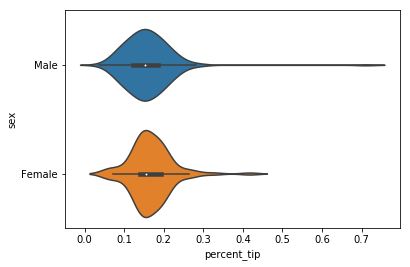

In [12]:
sns.violinplot(data = tips, x = "percent_tip", y = "sex")

In [13]:
# answer
import scipy.stats as stats
stats.ttest_ind(tips['percent_tip'][tips['sex'] == 'Male'],
                tips['percent_tip'][tips['sex'] == 'Female'])

Ttest_indResult(statistic=-1.0833972270477996, pvalue=0.2797103849605489)

Distributions look approx. normal except for a few outliers, equal variance assumption is met.   
Null hypothesis: the mean tip percentage is the same for males and females.  
Alternative hypothesis: the mean tip percentage is not the same for males and females.  
The p-value is greater than 0.05, there is no evidence that the means are different. 

**-1pt if not checking normality assumption  
-1pt if not checking equal variance assumption  
-1pt if no hypotheses (-0.5pt for each)  
-1pt if no conclusion (-0.5pt if not in context)** 

### Question 2: (11 pts)

In bioinformatics, k-mers refer to all the possible subsequences (of length k) from a read obtained through DNA sequencing. For example, if the DNA sequencing read is "ATCATCATG", then the 3-mers in that read include "ATC" (which occurs twice), "TCA" (which occurs twice), "CAT" (occurs twice), and "ATG" (occurs once). You can read more about k-mers on [Wikipedia](https://en.wikipedia.org/wiki/K-mer).

#### 2.1 (2 pts) Manually find the 4-mers if the DNA sequencing read is "ATCATCATG" and the number of occurences. 

The different 4-mers are "ATCA" (which occurs twice), "TCAT" (which occurs twice), "CATC" (which occurs once), "CATG" (which occurs 1).  

**-0.5pt per 4-mers with their occurences**

#### 2.2 (4 pts) Write this sequence in Python as a string and call it `my_seq1`. Write code to select each of the 4-mers found in the previous question (*Hint: use indexing with `[` `:` `]`*). What is the difference between the lowest and highest index? What is the highest index you will start with? How does it relate to the length of the string?

In [14]:
# answer
my_seq1 = "ATCATCATG"

In [15]:
my_seq1[0:4]

'ATCA'

In [16]:
my_seq1[1:5]

'TCAT'

In [17]:
my_seq1[2:6]

'CATC'

In [18]:
my_seq1[5:9]

'CATG'

In [19]:
len(my_seq1)

9

The difference between the two indexes is 4 (the length of the k-mer). The highest index to start with is 5 so that there are 4 letters left (9 - 4 = 5) since the length of the string is 9.  

**-1pt if no code/incorrect for the string  
-0.5pt per indexing to find the k-mers  
-1pt to make the connection with the length** 

#### 2.3 (4 pts) We will create a function that takes a DNA sequence as input and returns a dictionary with all 4-mers present in that string, and the number of occurences for each k-mer. 

The output of the function should be a dictionary that is structured like this:

{"CAG": 2, "AGC": 1, "GCC": 3}

where each key is a k-mer itself (e.g., "ATC") and each value is the number of times that k-mer occurs.

##### a. Define a function called `find_kmer` and taking inputs `(seq,k)`. 
##### b. Create an empty dictionary called `out_dict`. 
##### c. Start a loop. Define the range so that the last value is the last possible index for a k-mer (hint: think about your answer in question 2.2 in relation to the length of the string).
##### d. Check `if` that k-mer already appeared in the dictionary: if yes add 1 to the dictionary value, `else` set the dictionary value of that k-mer to be 1 (hint: this is similar to the loop we created to count how many times a letter appears in a string in WS21).
##### e. Return the dictionary `out_dict`.

#### Test the function to find the 4-mers in the DNA sequence `my_seq1`. Does it match what you found in the question 2.1?

In [20]:
# answer 
def find_kmer(seq,k):
    # create an empty dictionary to hold 3-mers
    out_dict = {}
    # loop over every position in the sequence except for the last 2
    for i in range(len(seq) - k + 1):
        # check if 3-mer is already in the output dictionary
        if seq[i:i+k] in out_dict:
            out_dict[seq[i:i+k]] += 1
        else:
            out_dict[seq[i:i+k]] = 1
    return out_dict

In [21]:
find_kmer(my_seq1,4)

{'ATCA': 2, 'TCAT': 2, 'CATC': 1, 'CATG': 1}

It should match!  

**-1pt if not defining function    
-1pt if not correct range in loop    
-1pt if not correct indexing of k-mer
-1pt if no comparison with 2.1** 

#### 2.4 (1 pt) Using the function from the previous question, what are the two most common 3-mers of the string coded below?

In [22]:
my_seq2 = "CAGCCCAATCAGGCTCTACTGCCACTAAACTTACGCAGGATATATTTACGCCGACGTACT"

In [23]:
# answer
find_kmer(my_seq2,3)

{'CAG': 3,
 'AGC': 1,
 'GCC': 3,
 'CCC': 1,
 'CCA': 2,
 'CAA': 1,
 'AAT': 1,
 'ATC': 1,
 'TCA': 1,
 'AGG': 2,
 'GGC': 1,
 'GCT': 1,
 'CTC': 1,
 'TCT': 1,
 'CTA': 2,
 'TAC': 4,
 'ACT': 4,
 'CTG': 1,
 'TGC': 1,
 'CAC': 1,
 'TAA': 1,
 'AAA': 1,
 'AAC': 1,
 'CTT': 1,
 'TTA': 2,
 'ACG': 3,
 'CGC': 2,
 'GCA': 1,
 'GGA': 1,
 'GAT': 1,
 'ATA': 2,
 'TAT': 2,
 'ATT': 1,
 'TTT': 1,
 'CCG': 1,
 'CGA': 1,
 'GAC': 1,
 'CGT': 1,
 'GTA': 1}

TAC and ACT are the most common 3-mers (occurred 4 times each).  
**-0.5pt if no code/incorrect for finding 3-mers    
-0.5pt if no sentence** 